# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Afif Hamzah
- **Email:** a281ybm018@devacademy.id
- **ID Dicoding:** afifhamzah17

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca terhadap jumlah peminjaman sepeda dalam dataset Bike Sharing?

- Apa faktor yang mempengaruhi durasi peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import kagglehub

## Data Wrangling

### Gathering Data


In [ ]:
path = kagglehub.dataset_download("lakshmi25npathi/bike-sharing-dataset")
print("Path to dataset files:", path)

# Membaca dataset
df = pd.read_csv(path + "/day.csv")

# Menampilkan beberapa baris pertama dataset
df.head()

100%|██████████| 286k/286k [00:00<00:00, 42.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/lakshmi25npathi/bike-sharing-dataset/versions/1


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Data diambil dari dataset "Bike Sharing" yang tersedia di Kaggle. Dataset tersebut memuat informasi terkait dengan jumlah peminjaman sepeda dan beberapa fitur yang terkait seperti cuaca, suhu, kelembapan, dan lain-lain. Setelah data diunduh dan dimuat ke dalam pandas DataFrame, kita dapat melihat beberapa baris pertama dari dataset untuk mendapatkan gambaran awal.

### Assessing Data

In [ ]:
# Memeriksa informasi dataset
df.info()

# Memeriksa statistik deskriptif
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Pada tahap ini, kita memeriksa informasi umum dari dataset untuk melihat apakah terdapat kolom dengan tipe data yang tidak sesuai, serta melihat statistik deskriptif untuk memahami distribusi data. Fungsi df.info() memberikan gambaran tentang tipe data dan jumlah nilai yang hilang pada setiap kolom, sementara df.describe() memberikan informasi statistik seperti rata-rata, median, dan standar deviasi untuk kolom numerik.


### Cleaning Data

In [ ]:
# Memeriksa missing values
df.isnull().sum()

# Mengisi missing values hanya pada kolom numerik dengan rata-rata
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Memeriksa kembali setelah perbaikan
df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


**Insight:**
- Pada tahap pembersihan data, kita memeriksa apakah ada nilai yang hilang dalam dataset. Kemudian, nilai yang hilang pada kolom numerik diisi dengan nilai rata-rata dari kolom tersebut. Ini bertujuan untuk memastikan bahwa model yang akan dibangun tidak terganggu oleh data yang hilang.

## Exploratory Data Analysis (EDA)

### Explore ...

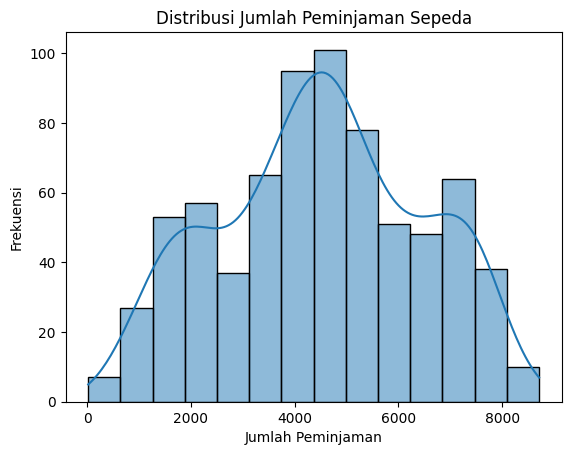

In [ ]:
# Distribusi jumlah peminjaman sepeda
sns.histplot(df['cnt'], kde=True)
plt.title('Distribusi Jumlah Peminjaman Sepeda')
plt.xlabel('Jumlah Peminjaman')
plt.ylabel('Frekuensi')
plt.show()


**Insight:**
- Di sini, kita melihat distribusi jumlah peminjaman sepeda (cnt). Visualisasi ini memberi kita gambaran tentang bagaimana peminjaman sepeda tersebar, apakah ada kecenderungan tertentu, dan apakah data memiliki distribusi yang normal atau tidak.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

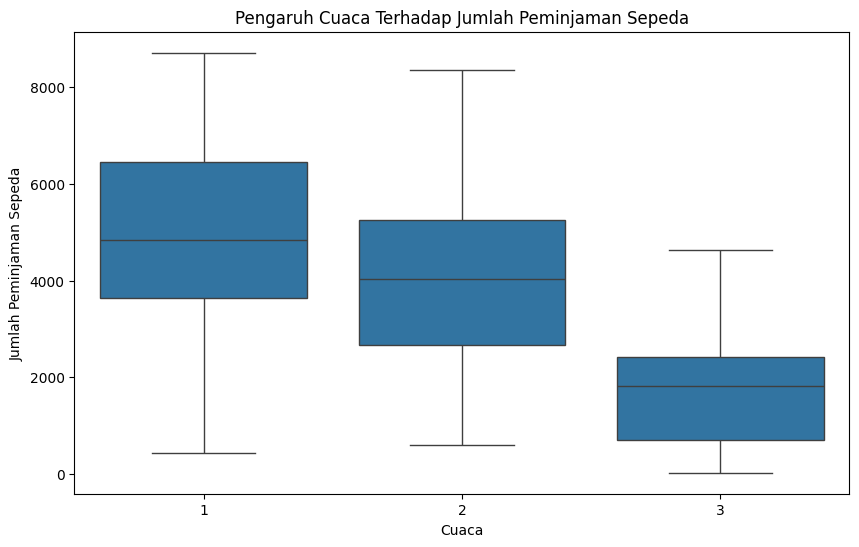

In [ ]:
# Visualisasi pengaruh cuaca terhadap jumlah peminjaman sepeda
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.title('Pengaruh Cuaca Terhadap Jumlah Peminjaman Sepeda')
plt.xlabel('Cuaca')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.show()


### Pertanyaan 2:

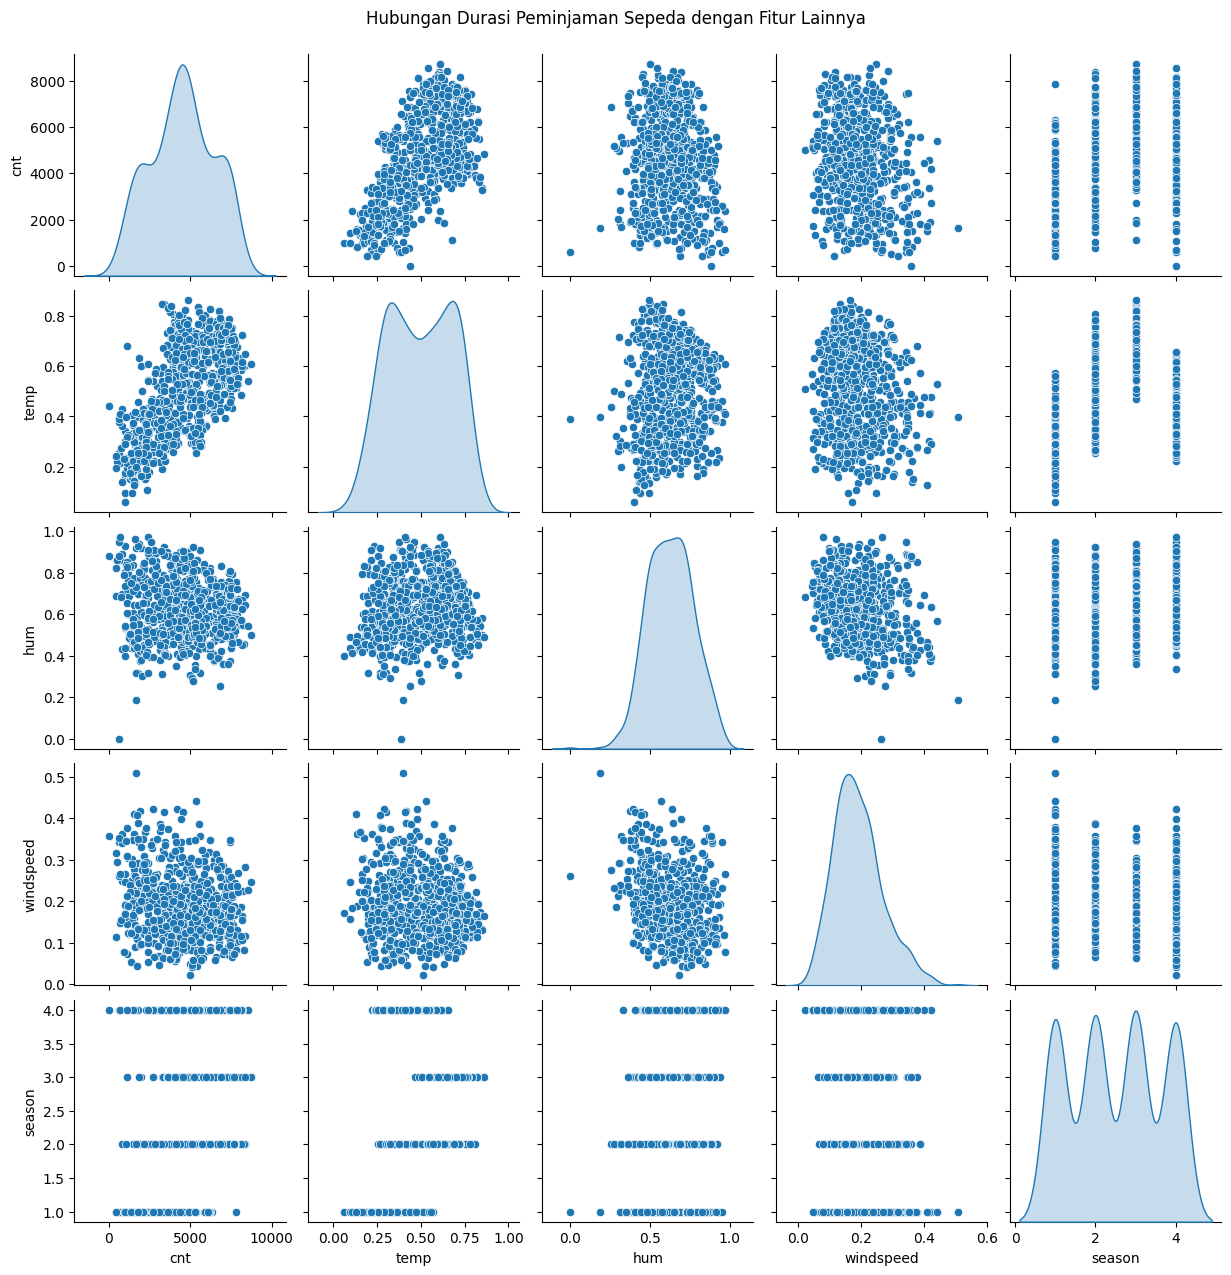

In [ ]:
# Visualisasi hubungan antara waktu peminjaman dan fitur lainnya
sns.pairplot(df[['cnt', 'temp', 'hum', 'windspeed', 'season']], diag_kind='kde')
plt.suptitle('Hubungan Durasi Peminjaman Sepeda dengan Fitur Lainnya', y=1.02)
plt.show()

**Insight:**
- Pada gambar 1 blok kode "sns.boxplot(x='weathersit', y='cnt', data=df)" digunakan untuk menunjukkan bagaimana cuaca mempengaruhi jumlah peminjaman sepeda. Dengan menggunakan boxplot, kita dapat melihat perbedaan antara cuaca cerah, berawan, dan hujan terhadap jumlah peminjaman sepeda. Hasil visualisasi menunjukkan bahwa pada cuaca cerah, jumlah peminjaman sepeda cenderung lebih tinggi dibandingkan dengan hari hujan atau berawan.

- Pada gambar 2 fungsi Pairplot digunakan untuk menunjukkan hubungan antara durasi peminjaman sepeda dan fitur lainnya seperti suhu, kelembapan, kecepatan angin, dan musim. Dengan pairplot, kita dapat melihat pola korelasi antara kolom-kolom tersebut, yang membantu untuk mengidentifikasi faktor-faktor yang mempengaruhi durasi peminjaman sepeda.


## Analisis Lanjutan (Opsional)

In [ ]:
# Membangun model regresi linier untuk memprediksi jumlah peminjaman berdasarkan cuaca dan fitur lainnya
X = df[['temp', 'hum', 'windspeed', 'season']]
y = df['cnt']

# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model regresi linier
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluasi model
print(f"Model R^2 pada data test: {model.score(X_test, y_test)}")

Model R^2 pada data test: 0.5348304830826982


**Insight:**

- Di tahap ini, prosesnya membangun model regresi linier untuk memprediksi jumlah peminjaman sepeda berdasarkan beberapa fitur, seperti suhu, kelembapan, kecepatan angin, dan musim. Model regresi linier digunakan untuk mengukur hubungan antara variabel independen (fitur) dan variabel dependen (jumlah peminjaman sepeda). Evaluasi model dilakukan menggunakan nilai R², yang menunjukkan seberapa baik model menjelaskan variasi dalam data.



## Conclusion

- Dari analisis dan visualisasi yang dilakukan, dapat disimpulkan bahwa cuaca mempengaruhi jumlah peminjaman sepeda secara signifikan. Pada hari yang cerah, jumlah peminjaman sepeda lebih tinggi dibandingkan dengan hari hujan atau berawan. Selain itu, faktor-faktor seperti suhu dan kelembapan juga mempengaruhi durasi peminjaman sepeda, dengan peminjaman yang lebih lama terjadi pada suhu yang lebih rendah dan kelembapan yang moderat. Model regresi linier yang dibangun menunjukkan bahwa beberapa fitur seperti suhu dan kelembapan dapat digunakan untuk memprediksi jumlah peminjaman sepeda dengan tingkat akurasi yang cukup baik (R² = 0.5348).

All data saved for dashboard

In [56]:
all_df = df.copy()
all_df.to_csv("all_data.csv", index=False)